# Chocolate Sales Prediction with Machine Learning

This project explores and models chocolate sales data using machine learning techniques. It includes a full data science workflow from data exploration and preprocessing to predictive modeling and evaluation.

## Data Loading and Cleaning

In [43]:
# import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# read in the csv file as a pandas dataframe
chocolate = pd.read_csv("chocolate_sales.csv")
chocolate

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04-Jan-22,"$5,320",180
1,Van Tuxwell,India,85% Dark Bars,01-Aug-22,"$7,896",94
2,Gigi Bohling,India,Peanut Butter Cubes,07-Jul-22,"$4,501",91
3,Jan Morforth,Australia,Peanut Butter Cubes,27-Apr-22,"$12,726",342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24-Feb-22,"$13,685",184
...,...,...,...,...,...,...
1089,Karlen McCaffrey,Australia,Spicy Special Slims,17-May-22,"$4,410",323
1090,Jehu Rudeforth,USA,White Choc,07-Jun-22,"$6,559",119
1091,Ches Bonnell,Canada,Organic Choco Syrup,26-Jul-22,$574,217
1092,Dotty Strutley,India,Eclairs,28-Jul-22,"$2,086",384


In [14]:
# explore the data
chocolate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sales Person   1094 non-null   object
 1   Country        1094 non-null   object
 2   Product        1094 non-null   object
 3   Date           1094 non-null   object
 4   Amount         1094 non-null   object
 5   Boxes Shipped  1094 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 51.4+ KB


In [15]:
# check for null values
chocolate.isnull().sum()

Sales Person     0
Country          0
Product          0
Date             0
Amount           0
Boxes Shipped    0
dtype: int64

In [16]:
# change names of columns to lowercase
chocolate.columns = chocolate.columns.str.lower()
chocolate.columns

Index(['sales person', 'country', 'product', 'date', 'amount',
       'boxes shipped'],
      dtype='object')

In [17]:
# check the values in 'amount' column
chocolate.amount.value_counts()

amount
$2,317      5
$2,303      4
$7,714      4
$4,361      4
$6,454      4
           ..
$16,233     1
$5,313      1
$3,528      1
$2,450      1
$4,410      1
Name: count, Length: 827, dtype: int64

In [18]:
# clean and change the data type of 'amount'
chocolate['amount'] = chocolate['amount'].replace('[\$,]', '', regex=True).astype(float)
chocolate['amount']

0        5320.0
1        7896.0
2        4501.0
3       12726.0
4       13685.0
         ...   
1089     4410.0
1090     6559.0
1091      574.0
1092     2086.0
1093     5075.0
Name: amount, Length: 1094, dtype: float64

In [19]:
# check the 'date' format
chocolate.date

0       04-Jan-22
1       01-Aug-22
2       07-Jul-22
3       27-Apr-22
4       24-Feb-22
          ...    
1089    17-May-22
1090    07-Jun-22
1091    26-Jul-22
1092    28-Jul-22
1093    23-May-22
Name: date, Length: 1094, dtype: object

In [20]:
# change type of 'date' and extract additional variables
chocolate['date'] = pd.to_datetime(chocolate['date'], format='%d-%b-%y')

chocolate['year'] = chocolate['date'].dt.year
chocolate['month'] = chocolate['date'].dt.month
chocolate['dayofweek'] = chocolate['date'].dt.dayofweek     # 0 = Monday, 6 = Sunday

# Drop the original 'date' column
chocolate = chocolate.drop(columns=['date'])

chocolate

,sales person,country,product,amount,boxes shipped,year,month,dayofweek
0,Jehu Rudeforth,UK,Mint Chip Choco,5320.0,180,2022,1,1
1,Van Tuxwell,India,85% Dark Bars,7896.0,94,2022,8,0
2,Gigi Bohling,India,Peanut Butter Cubes,4501.0,91,2022,7,3
3,Jan Morforth,Australia,Peanut Butter Cubes,12726.0,342,2022,4,2
4,Jehu Rudeforth,UK,Peanut Butter Cubes,13685.0,184,2022,2,3
...,...,...,...,...,...,...,...,...
1089,Karlen McCaffrey,Australia,Spicy Special Slims,4410.0,323,2022,5,1
1090,Jehu Rudeforth,USA,White Choc,6559.0,119,2022,6,1
1091,Ches Bonnell,Canada,Organic Choco Syrup,574.0,217,2022,7,1
1092,Dotty Strutley,India,Eclairs,2086.0,384,2022,7,3


In [22]:
# explore the 'month' variable
sorted(chocolate['month'].unique())

[1, 2, 3, 4, 5, 6, 7, 8]

In [23]:
# explore the 'month' variable
sorted(chocolate['dayofweek'].unique())

[0, 1, 2, 3, 4]

## Exploratory Data Analysis (EDA)

In [24]:
# generate descriptive statistics
chocolate.describe().T

,count,mean,std,min,25%,50%,75%,max
amount,1094.0,5652.308044,4102.442014,7.0,2390.5,4868.5,8027.25,22050.0
boxes shipped,1094.0,161.797989,121.544145,1.0,70.0,135.0,228.75,709.0
year,1094.0,2022.000000,0.000000,2022.0,2022.0,2022.0,2022.00,2022.0
month,1094.0,4.576782,2.316465,1.0,3.0,5.0,7.00,8.0
dayofweek,1094.0,1.877514,1.415373,0.0,1.0,2.0,3.00,4.0


C:\Users\nadine\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


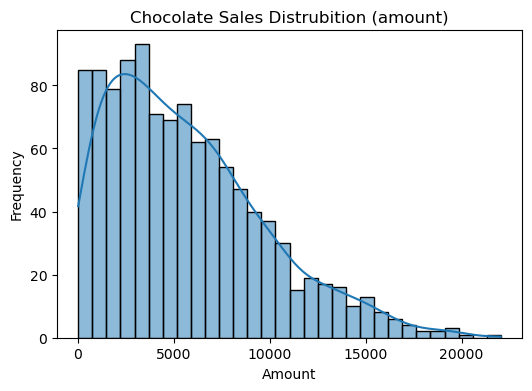

In [25]:
# show the 'amount' distribution
plt.figure(figsize=(6, 4))
sns.histplot(chocolate['amount'], kde=True, bins=30)
plt.title("Chocolate Sales Distrubition (amount)")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()

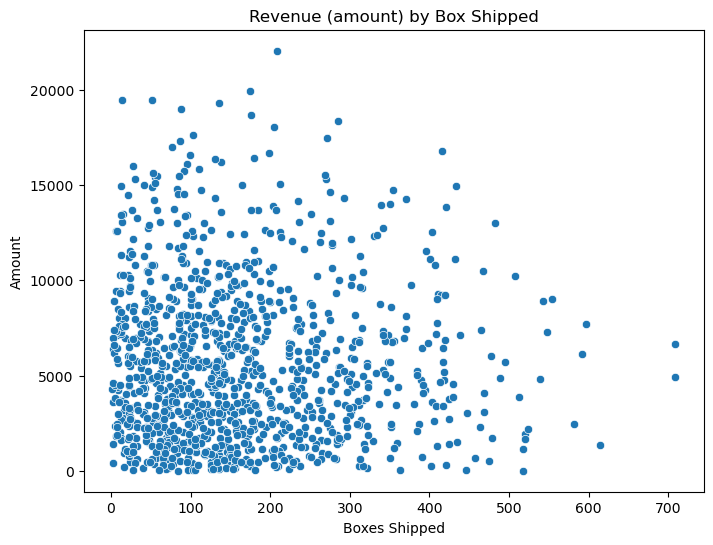

In [26]:
# 'amount' by 'box shipped' distribution
plt.figure(figsize=(8, 6))
sns.scatterplot(data=chocolate, x='boxes shipped', y='amount')
plt.title("Revenue (amount) by Box Shipped")
plt.xlabel("Boxes Shipped")
plt.ylabel("Amount")
plt.show()

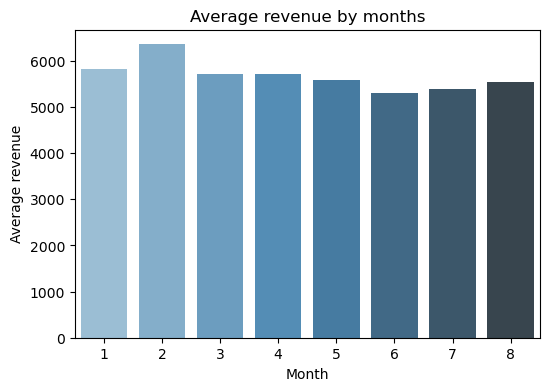

In [27]:
# plot average sales by months
monthly_avg = chocolate.groupby('month')['amount'].mean().reset_index()

plt.figure(figsize=(6, 4))
sns.barplot(data=monthly_avg, x='month', y='amount', palette='Blues_d')
plt.title("Average revenue by months")
plt.xlabel("Month")
plt.ylabel("Average revenue")
plt.show()

In [28]:
monthly_avg

,month,amount
0,1,5818.863636
1,2,6357.972727
2,3,5721.244275
3,4,5712.296610
4,5,5576.977778
5,6,5307.631902
6,7,5392.114094
7,8,5545.880597


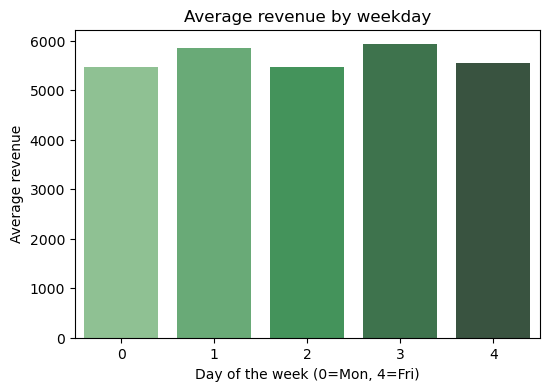

In [29]:
# plot average sales by day of the week
weekday_avg = chocolate.groupby('dayofweek')['amount'].mean().reset_index()

plt.figure(figsize=(6, 4))
sns.barplot(data=weekday_avg, x='dayofweek', y='amount', palette='Greens_d')
plt.title("Average revenue by weekday")
plt.xlabel("Day of the week (0=Mon, 4=Fri)")
plt.ylabel("Average revenue")
plt.show()

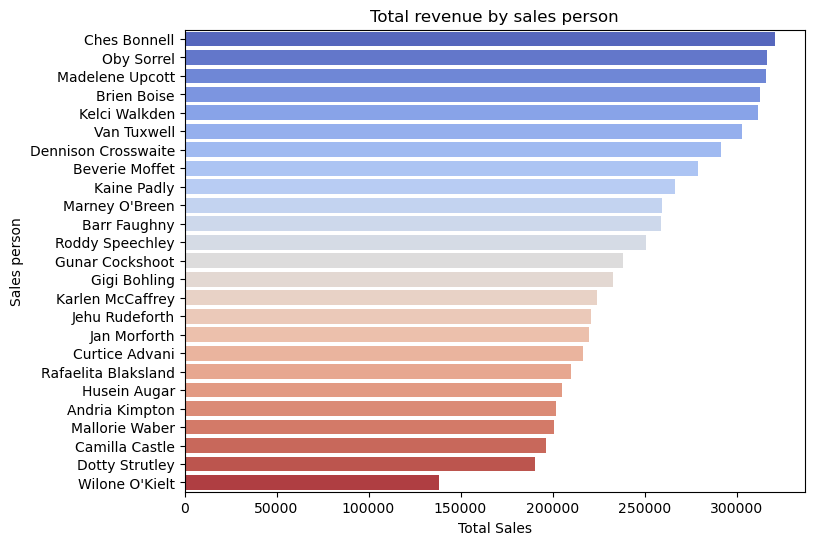

In [30]:
# plot revenue('amount') sum by sales person
sales_by_person = chocolate.groupby('sales person')['amount'].sum().sort_values(ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x=sales_by_person.values, y=sales_by_person.index, palette='coolwarm')
plt.title("Total revenue by sales person")
plt.xlabel("Total Sales")
plt.ylabel("Sales person")
plt.xticks(rotation=0)
plt.show()

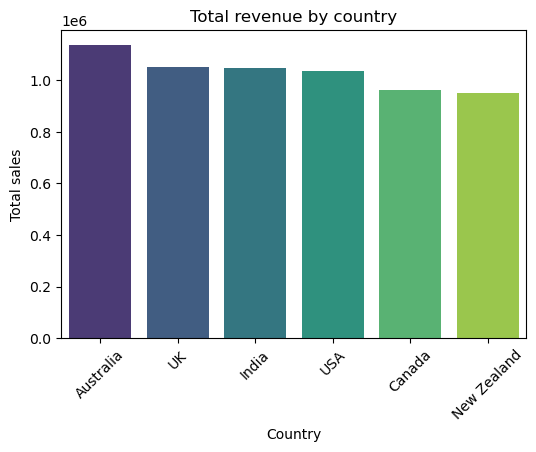

In [31]:
# plot revenue('amount') sum by country
sales_by_country = chocolate.groupby('country')['amount'].sum().sort_values(ascending=False)

plt.figure(figsize=(6, 4))
sns.barplot(x=sales_by_country.index, y=sales_by_country.values, palette='viridis')
plt.title("Total revenue by country")
plt.xlabel("Country")
plt.ylabel("Total sales")
plt.xticks(rotation=45)
plt.show()

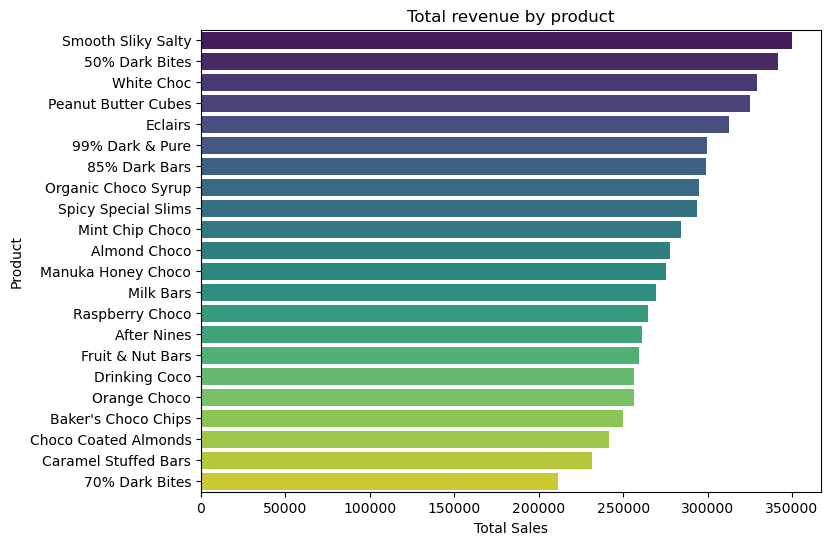

In [32]:
# plot revenue('amount') sum by product
sales_by_product = chocolate.groupby('product')['amount'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(data=sales_by_product, x='amount', y='product', palette='viridis')
plt.title("Total revenue by product")
plt.xlabel("Total Sales")
plt.ylabel("Product")
plt.xticks(rotation=0)
plt.show()

In [33]:
sales_by_product

,product,amount
0,Smooth Sliky Salty,349692.0
1,50% Dark Bites,341712.0
2,White Choc,329147.0
3,Peanut Butter Cubes,324842.0
4,Eclairs,312445.0
5,99% Dark & Pure,299796.0
6,85% Dark Bars,299229.0
7,Organic Choco Syrup,294700.0
8,Spicy Special Slims,293454.0
9,Mint Chip Choco,283969.0


### Exploratory Data Analysis (EDA) Summary


- The dataset includes chocolate sales data covering **8 months** and only on **weekdays (Monday to Friday)**, which suggests that transactions occurred during standard business days.

- The target variable `amount` is **right-skewed**, with the majority of values below 5,000 and a long tail of outliers extending above 20,000. This distribution indicates that most sales are relatively small, with a few large-value transactions.

- The scatter plot of `boxes shipped` vs. `amount` shows a **dense concentration of points near zero**, gradually dispersing as values increase. This reflects a **positive but non-linear** relationship with significant variance — not all large box shipments correspond to proportionally high revenue.

- **Monthly average revenue** ranges from approximately **5,000 to 6,400**. **February** had the highest average, followed by **January**. Other months performed relatively evenly, suggesting **mild seasonality**.

- **Day-of-week analysis** shows **Thursday** and **Tuesday** as the most profitable days (both approaching 6,000 in average revenue), with other weekdays showing only slightly lower averages. This implies **no dramatic weekday effect**, though Thursdays are slightly more profitable.

- **Salesperson performance** is relatively close among top performers, including **Chess Bonnell, Oby Sorrel**, and **Madelene Upcott**, each exceeding 300,000 in total revenue. However, **Wilone O'Kielt** stands out as the lowest performer, with total revenue below 150,000 — a **significant gap** compared to others.

- **Country-level sales** show **Australia** as the top market, with the **UK, India, and USA** following closely. The differences between countries are **present but not extreme**, suggesting a generally balanced market distribution.

- **Product performance** reveals a **visible variation in total revenue**:
  - The top products include *Smooth Silky Salty* and *50% Dark Bites*, each nearing 350,000 in total revenue.
  - They are followed by *White Choc* and *Peanut Butter Cubes*, just under 330,000.
  - The lowest-performing product, *70% Dark Bites*, has just over 200,000 in total revenue — indicating a **~40% drop** from the top product.
  
  While the drop-off is gradual, it is **consistent and significant**, making product type a potentially important predictor.

### Conclusion:
Overall, the data shows **mild variation** across time-based features (month, day of the week), but **clearer patterns emerge across products and salespeople**. The relationships are **non-linear**, the target is **skewed**, and multiple categorical features are present — making this dataset well-suited for **tree-based regression models** such as `RandomForestRegressor` or `XGBoost`.

### Model Selection

For this regression task we choose to start with a **Random Forest Regressor**.

This decision is based on several key considerations:

- **Non-linearity**: Relationships between features (e.g., between product type, salesperson, and amount) are likely non-linear. Tree-based models like Random Forest can naturally model complex interactions without requiring transformation.

- **Skewed target variable**: The target `amount` is heavily right-skewed, which can negatively affect linear models. Random Forests are robust to skewed distributions and outliers.

- **Categorical variables**: After encoding, Random Forest handles categorical data well without assuming any ordering or linear relationship between categories.

- **Low risk of overfitting**: Random Forest uses multiple trees and averaging, reducing the risk of overfitting, especially on relatively small datasets like this one (~1,100 rows).

- **Interpretability**: Random Forests provide feature importance metrics that can help us understand which variables contribute most to the prediction.

We are not using linear models (like Linear Regression or Ridge/Lasso) at this stage, because:
- They assume linear relationships between input features and the target variable.
- They are sensitive to outliers and skewed distributions.
- They don't model feature interactions without manually creating them.

Alternative models such as **Gradient Boosting** or **XGBoost** could offer improved performance and will be considered in the next steps if needed.

We proceed with training and evaluating a `RandomForestRegressor` as the baseline model.

In [34]:
# One-Hot Encode categorical features
chocolate_enc = pd.get_dummies(
    chocolate,
    columns=['sales person', 'country', 'product'],
    drop_first=True     # first of the classes will be removed and used as a base
)

chocolate_enc.columns

Index(['amount', 'boxes shipped', 'year', 'month', 'dayofweek',
       'sales person_Barr Faughny', 'sales person_Beverie Moffet',
       'sales person_Brien Boise', 'sales person_Camilla Castle',
       'sales person_Ches Bonnell', 'sales person_Curtice Advani',
       'sales person_Dennison Crosswaite', 'sales person_Dotty Strutley',
       'sales person_Gigi Bohling', 'sales person_Gunar Cockshoot',
       'sales person_Husein Augar', 'sales person_Jan Morforth',
       'sales person_Jehu Rudeforth', 'sales person_Kaine Padly',
       'sales person_Karlen McCaffrey', 'sales person_Kelci Walkden',
       'sales person_Madelene Upcott', 'sales person_Mallorie Waber',
       'sales person_Marney O'Breen', 'sales person_Oby Sorrel',
       'sales person_Rafaelita Blaksland', 'sales person_Roddy Speechley',
       'sales person_Van Tuxwell', 'sales person_Wilone O'Kielt',
       'country_Canada', 'country_India', 'country_New Zealand', 'country_UK',
       'country_USA', 'product_70% Dar

In [35]:
# Define target('amount') and features(other variables)
X = chocolate_enc.drop('amount', axis=1)
y = chocolate_enc['amount']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

X_test

,boxes shipped,year,month,dayofweek,sales person_Barr Faughny,sales person_Beverie Moffet,sales person_Brien Boise,sales person_Camilla Castle,sales person_Ches Bonnell,sales person_Curtice Advani,...,product_Manuka Honey Choco,product_Milk Bars,product_Mint Chip Choco,product_Orange Choco,product_Organic Choco Syrup,product_Peanut Butter Cubes,product_Raspberry Choco,product_Smooth Sliky Salty,product_Spicy Special Slims,product_White Choc
482,60,2022,7,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
139,30,2022,4,0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
88,420,2022,4,1,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
939,104,2022,1,0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
732,356,2022,4,1,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
708,22,2022,2,1,False,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
331,118,2022,1,3,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
361,81,2022,5,4,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
814,182,2022,3,1,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [39]:
# Train RandomForestRegressor

# Initialize the model
rf = RandomForestRegressor(
    n_estimators=100,      # number of trees
    random_state=42,       # for reproducibility
    max_depth=10,
    n_jobs=-1              # to use use all CPU cores
)

# Fit the model
rf.fit(X_train, y_train)

rf

RandomForestRegressor(max_depth=10, n_jobs=-1, random_state=42)

In [40]:
# Feature importances
feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feature_importances.sort_values(ascending=False).head(10)

boxes shipped                 0.239598
month                         0.082118
dayofweek                     0.060761
product_Smooth Sliky Salty    0.023258
sales person_Brien Boise      0.022420
country_USA                   0.022374
country_India                 0.020135
country_New Zealand           0.019963
country_UK                    0.019824
product_Mint Chip Choco       0.019497
dtype: float64

In [41]:
# Predict on test set
y_pred = rf.predict(X_test)

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE:  {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²:   {r2:.4f}")

MAE:  3299.56
RMSE: 4116.52
R²:   -0.0441


In [55]:
# Hyperparameter tuning (tree depth)
for depth in [5, 8, 12, 15, None]:
    model = RandomForestRegressor(n_estimators=100, max_depth=depth, random_state=42, n_jobs=-1)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print(f"Depth={depth} | RMSE={np.sqrt(mean_squared_error(y_test, pred)):.2f} | MAE={mean_absolute_error(y_test, pred):.2f} | R²={r2_score(y_test, pred):.4f}")

Depth=5 | RMSE=4070.63 | MAE=3256.28 | R²=-0.0209
Depth=8 | RMSE=4089.38 | MAE=3271.09 | R²=-0.0304
Depth=12 | RMSE=4150.06 | MAE=3319.65 | R²=-0.0612
Depth=15 | RMSE=4166.97 | MAE=3341.87 | R²=-0.0698
Depth=None | RMSE=4197.59 | MAE=3359.94 | R²=-0.0856


In [44]:
# Train GradientBoostingRegressor

# Initialize the model
gbr = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)

# Fit the model
gbr.fit(X_train, y_train)
# Predict on test set
y_pred_gbr = gbr.predict(X_test)

print("Gradient Boosting:")
print(f"MAE:  {mean_absolute_error(y_test, y_pred_gbr):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_gbr)):.2f}")
print(f"R²:   {r2_score(y_test, y_pred_gbr):.4f}")

Gradient Boosting:
MAE:  3642.61
RMSE: 4545.47
R²:   -0.2730


### Model Comparison Summary

Two regression models were trained and evaluated to predict the sales revenue (`amount`):

#### 1. **Random Forest Regressor (`max_depth=5`)**
- **MAE**: 3256.28  
- **RMSE**: 4070.63  
- **R$^{2}$**: -0.0209

#### 2. **Gradient Boosting Regressor (`max_depth=5`)**
- **MAE**: 3642.61  
- **RMSE**: 4545.47  
- **R$^{2}$:**: -0.2730

**Result:**  
The Random Forest model outperformed Gradient Boosting across all evaluation metrics.  
It produced lower average and squared prediction errors and had a higher (though still negative) R$^{2}$ score.  
Therefore, **Random Forest with a depth of 5 was selected as the best model** for further evaluation.

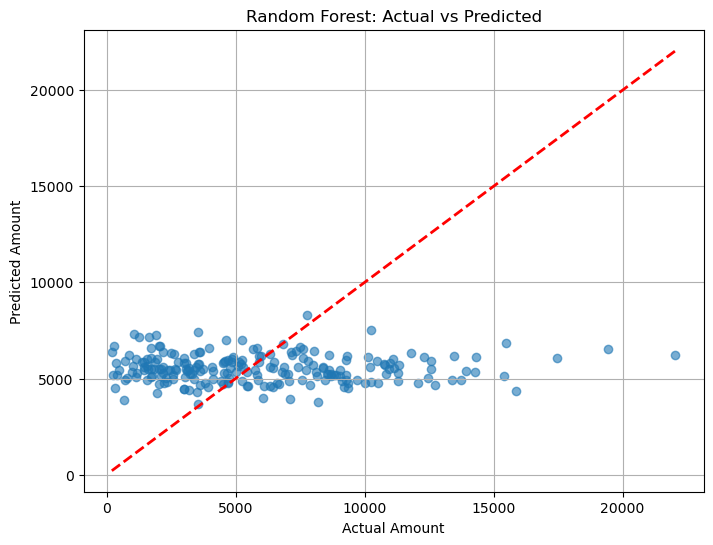

In [56]:
# Plot Actual vs Predicted by RandomForestRegressor
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Amount')
plt.ylabel('Predicted Amount')
plt.title('Random Forest: Actual vs Predicted')
plt.grid(True)
plt.show()

The model tends to predict values near the average amount rather than capturing the variability in the data, resulting in poor predictive performance. This confirms the numerical evaluation metrics showing low accuracy and weak explanatory power of the selected features.

## Final Conclusions

### Exploratory Data Analysis (EDA) Results
- The dataset contains 1094 sales records with features such as sales person, country, product, date, amount, and boxes shipped.
- Sales revenue (`amount`) has a right-skewed distribution.
- The median sales amount is approximately 4,870, meaning half of the sales are below this value. While the distribution is skewed, most data points fall below approximately 8,000.
- Categorical features like product type and country show some variability in sales, but differences are moderate.

### Modeling Results
- Two models were tested: Random Forest Regressor and Gradient Boosting Regressor.
- Random Forest with maximum tree depth of 5 performed better:
  - MAE: ~3256
  - RMSE: ~4071
  - R²: approximately -0.02 (close to zero but negative)
- The negative R² and the actual vs. predicted plot indicate that the model struggles to capture the variability in sales amounts, often predicting values near the average.
- This suggests that the current features and dataset size might be insufficient for highly accurate prediction, or that important factors influencing sales are missing.
- Future improvements could include:
  - Collecting more data or additional relevant features
  - Exploring alternative modeling techniques and feature engineering
  - Investigating external factors influencing sales


Overall, while the models provide a baseline prediction, further data enrichment and analysis are needed to improve accuracy.

### Business Insights
- The most profitable products are "Smooth Silky Salty," "50% Dark Bites," "White Choc," and "Peanut Butter Cubes," contributing the highest total sales revenue.
- Sales are somewhat consistent across countries, with Australia generating the highest revenue, followed closely by the UK, India, and the USA.
- Sales activity is concentrated during weekdays (Monday to Friday), with Thursday and Tuesday showing slightly higher average sales.
- Top salespersons like Chess Bonnell, Oby Sorrel, and Madelene Upcott lead in total sales, while Wilone O'Kielt has the lowest sales figures.
- These insights can guide targeted marketing efforts, inventory management, and sales strategies to focus on high-performing products, countries, and sales personnel.